# An√°lisis y segmentaci√≥n de clientes para mejorar la retenci√≥n en el gimnasio

Analizar y segmentar a los clientes del gimnasio para identificar patrones de uso y factores que influyen en la cancelaci√≥n de membres√≠as, mejorando as√≠ la retenci√≥n y lealtad.

## An√°lisis exploratorio de datos (EDA)

- Observa el dataset: ¬øcontiene alguna caracter√≠stica ausente? Estudia los valores promedio y la desviaci√≥n est√°ndar (utiliza el m√©todo describe()).
- Observa los valores medios de las caracter√≠sticas en dos grupos: para las personas que se fueron (cancelaci√≥n) y para las que se quedaron (utiliza el m√©todo groupby()).
- Traza histogramas de barras y distribuciones de caracter√≠sticas para aquellas personas que se fueron (cancelaci√≥n) y para las que se quedaron.
- Crea una matriz de correlaci√≥n y mu√©strala.

### Librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>√âxito</b> - ¬°Buen inicio! Las herramientas seleccionadas y las preguntas planteadas para el an√°lisis exploratorio de datos son adecuadas para el objetivo del proyecto. Est√°s en el camino correcto para identificar patrones clave. ¬°Sigue as√≠! </div>





### EDA

=== Informaci√≥n del Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_tot

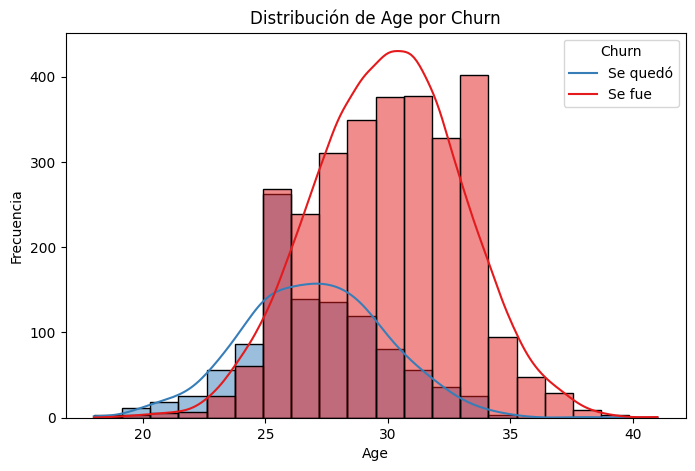

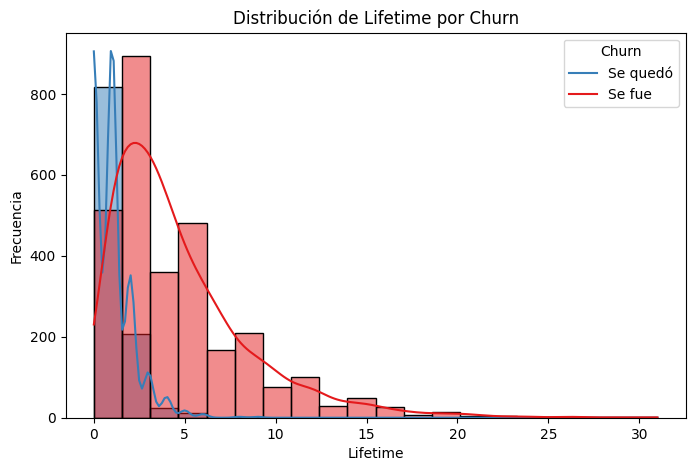

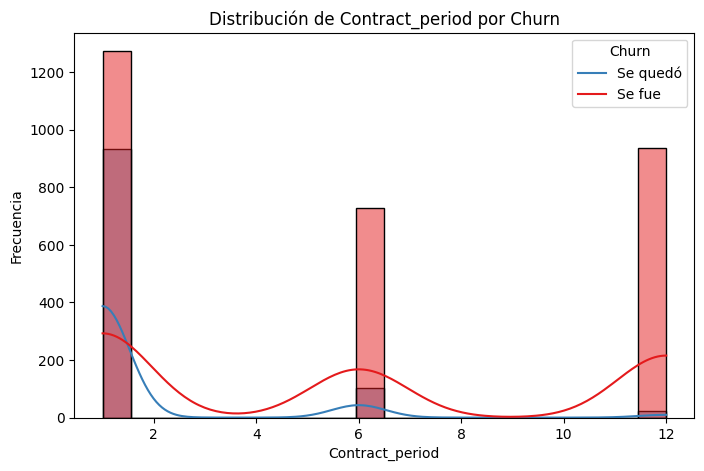

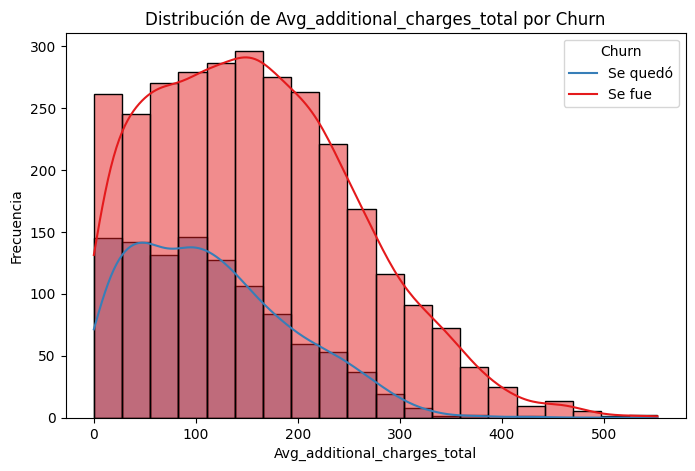

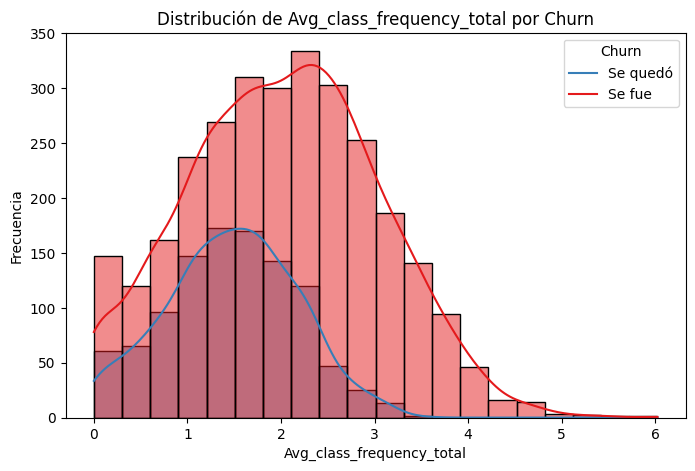

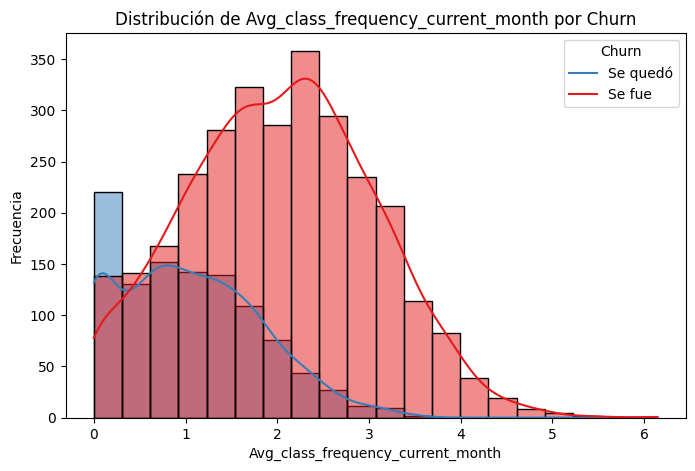

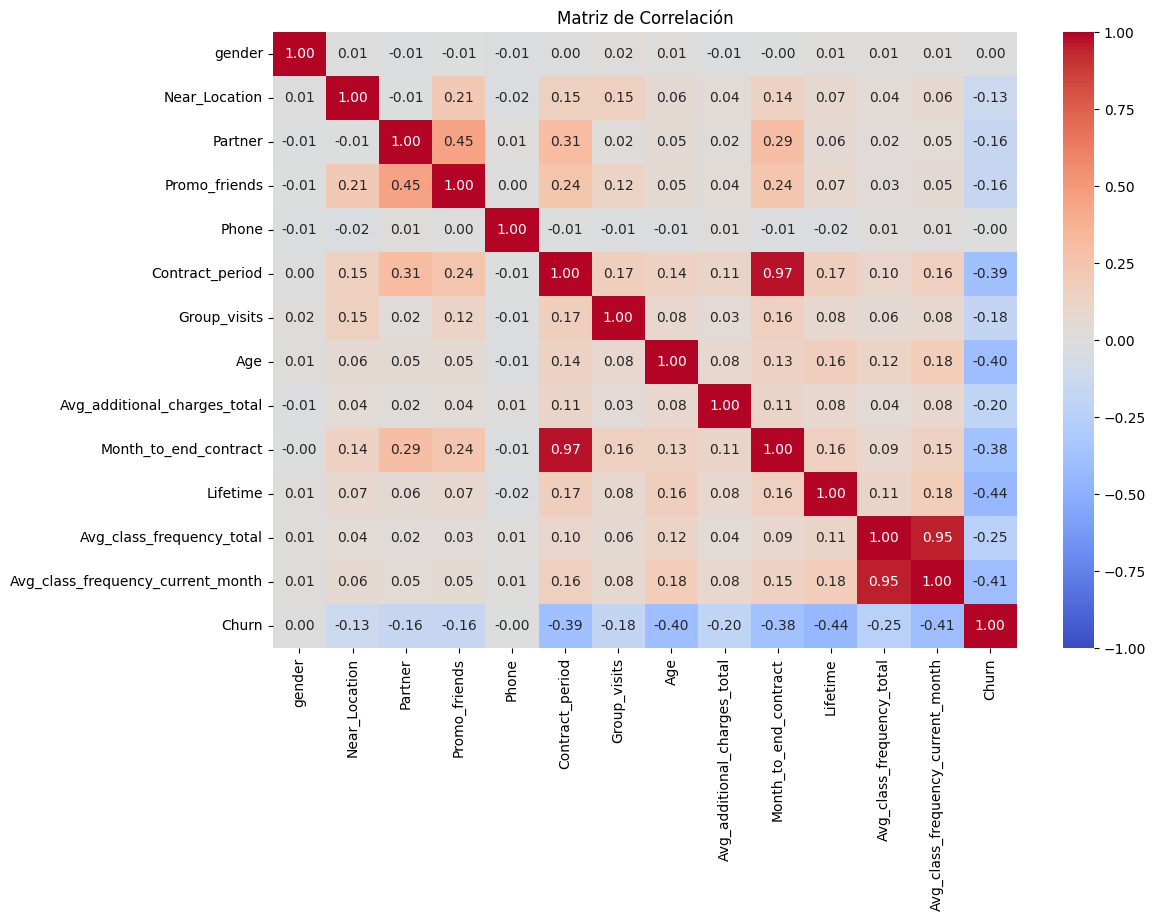

In [3]:
# Cargar los datos
df = pd.read_csv('D:gym_churn_us.csv')

# Informaci√≥n general del dataset
print("=== Informaci√≥n del Dataset ===")
print(df.info())
print("\n=== Resumen Estad√≠stico ===")
print(df.describe())

# Valores medios por grupo (Churn)
group_means = df.groupby('Churn').mean()
print("\n=== Valores medios por grupo (Churn) ===")
print(group_means)

# Histogramas para caracter√≠sticas seleccionadas
columns_to_plot = ['Age', 'Lifetime', 'Contract_period', 'Avg_additional_charges_total', 
                   'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='Set1', bins=20)
    plt.title(f'Distribuci√≥n de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend(title='Churn', labels=['Se qued√≥', 'Se fue'])
    plt.show()

# Matriz de correlaci√≥n
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Matriz de Correlaci√≥n')
plt.show()

- Los clientes que se fueron (Churn=1) tienen diferencias notables en comparaci√≥n con los que se quedaron (Churn=0):
- Las desviaciones est√°ndar son similares entre ambos grupos, lo que indica una variabilidad comparable en las caracter√≠sticas analizadas.
- Estas correlaciones sugieren que la duraci√≥n del contrato y la participaci√≥n en clases son factores relevantes para retener a los clientes.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>√âxito</b> - ¬°Excelente an√°lisis exploratorio de datos! Los histogramas y la matriz de correlaci√≥n destacan patrones clave que diferencian a los clientes seg√∫n su estado de cancelaci√≥n. Adem√°s, las observaciones son claras y relevantes para el objetivo del proyecto. ¬°Sigue as√≠! </div>

##  Construir un modelo para predecir la cancelaci√≥n de usuarios

- Crea un modelo de clasificaci√≥n binaria para clientes donde la caracter√≠stica objetivo es la marcha del usuario o la usuaria el mes siguiente.

- Divide los datos en conjuntos de entrenamiento y validaci√≥n utilizando la funci√≥n train_test_split().
- Entrena el modelo en el set de entrenamiento con dos m√©todos:
-- regresi√≥n log√≠stica;
-- bosque aleatorio.
- Eval√∫a la exactitud, precisi√≥n y recall para ambos modelos utilizando los datos de validaci√≥n. Util√≠zalos para comparar los modelos. ¬øQu√© modelo dio mejores resultados?
- Recuerda indicar el par√°metro random_state cuando dividas los datos y definas el algoritmo. 

In [4]:
# Paso 1: Separar caracter√≠sticas y la variable objetivo
X = df.drop('Churn', axis=1)
y = df['Churn']

# Codificar variables categ√≥ricas si es necesario
X = pd.get_dummies(X, drop_first=True)

# Paso 2: Dividir los datos en entrenamiento y validaci√≥n
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Entrenar los modelos
# Modelo 1: Regresi√≥n log√≠stica
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_val)

# Modelo 2: Bosque aleatorio
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

# Paso 4: Evaluar los modelos
def evaluate_model(y_true, y_pred, model_name):
    print(f"=== {model_name} ===")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print("\n")

print("\n=== Resultados ===")
evaluate_model(y_val, y_pred_log, "Regresi√≥n Log√≠stica")
evaluate_model(y_val, y_pred_rf, "Bosque Aleatorio")

# Opcional: Informe completo de clasificaci√≥n
print("\n=== Informe Completo ===")
print("Regresi√≥n Log√≠stica:\n", classification_report(y_val, y_pred_log))
print("Bosque Aleatorio:\n", classification_report(y_val, y_pred_rf))


=== Resultados ===
=== Regresi√≥n Log√≠stica ===
Accuracy: 0.92
Precision: 0.87
Recall: 0.78


=== Bosque Aleatorio ===
Accuracy: 0.91
Precision: 0.85
Recall: 0.78



=== Informe Completo ===
Regresi√≥n Log√≠stica:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       598
           1       0.87      0.78      0.83       202

    accuracy                           0.92       800
   macro avg       0.90      0.87      0.89       800
weighted avg       0.91      0.92      0.91       800

Bosque Aleatorio:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.85      0.78      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800



Para ambas clases (Churn = 0 y Churn = 1), los modelos son consistentes, aunque la regresi√≥n log√≠stica parece ser un poco mejor en t√©rminos de balance entre precisi√≥n y recall.


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>√âxito</b> - ¬°Buen trabajo construyendo y evaluando ambos modelos! La comparaci√≥n de m√©tricas clave como precisi√≥n, recall y exactitud est√° bien estructurada, y la interpretaci√≥n de los resultados es clara. ¬°Sigue as√≠, excelente avance! </div>

## Crear cl√∫steres de usuarios/as

- Estandariza los datos.
- Utiliza la funci√≥n linkage() para crear una matriz de distancias basada en la matriz de caracter√≠sticas estandarizada y trazar un dendrograma. Nota: ¬°renderizar el dendrograma puede llevar tiempo! Utiliza el gr√°fico resultante para estimar el n√∫mero de cl√∫steres que puedes destacar.
- Entrena el modelo de clustering con el algortimo K-means y predice los cl√∫steres de clientes. (Deja que el n√∫mero de cl√∫steres sea n=5 para que sea m√°s sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dar√° tales pistas, as√≠ que tendr√°s que decidir bas√°ndote en el gr√°fico del paso anterior.)
- Mira los valores medios de caracter√≠stica para los cl√∫steres.¬øHay algo que te llame la atenci√≥n?
- Traza distribuciones de caracter√≠sticas para los cl√∫steres. ¬øNotas algo?
- Calcula la tasa de cancelaci√≥n para cada cl√∫ster (utiliza el m√©todo groupby()). ¬øDifieren en t√©rminos de tasa de cancelaci√≥n? ¬øQu√© grupos son propensos a irse y cu√°les son leales?

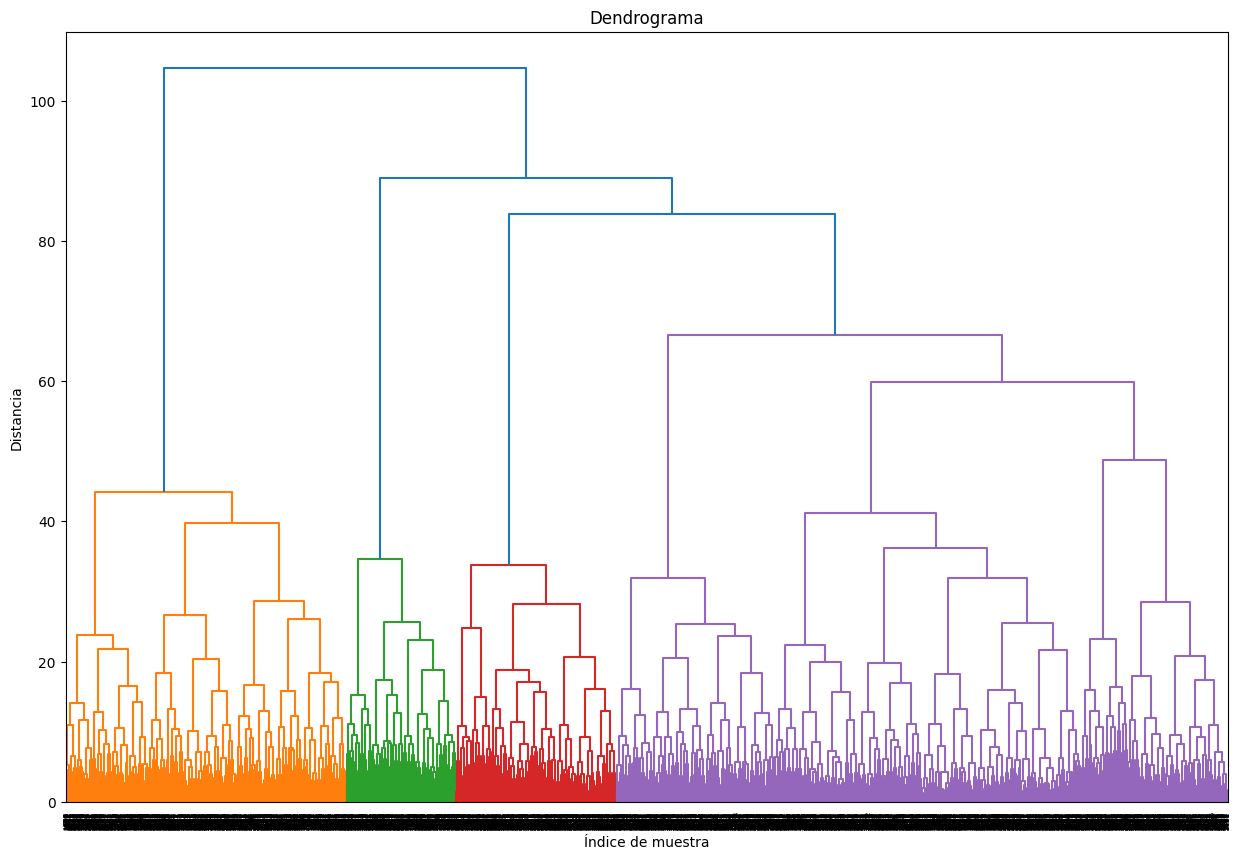

Valores medios por cl√∫ster:
           gender  Near_Location   Partner  Promo_friends     Phone  \
Cluster                                                               
0        0.484801       0.698363  0.301637       0.007015  0.899454   
1        0.494471       0.947867  0.791469       0.998420  0.906793   
2        0.464396       0.913313  0.766254       0.493808  0.925697   
3        0.547794       0.937500  0.742647       0.424632  0.863971   
4        0.568233       0.878076  0.178971       0.048098  0.914989   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               1.733437      0.255651  28.074825   
1               2.740916      0.431280  28.903633   
2              10.495356      0.506192  30.091331   
3              11.194853      0.575368  29.720588   
4               2.120805      0.456376  29.993289   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                    

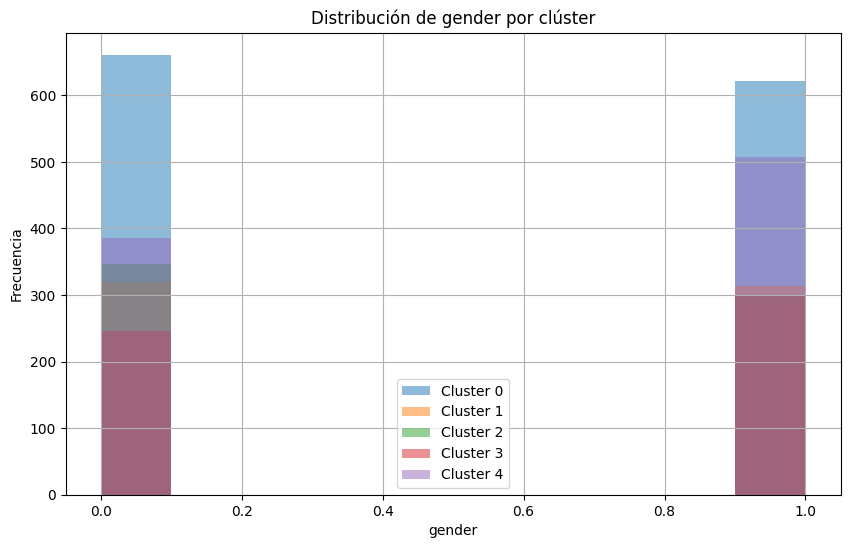

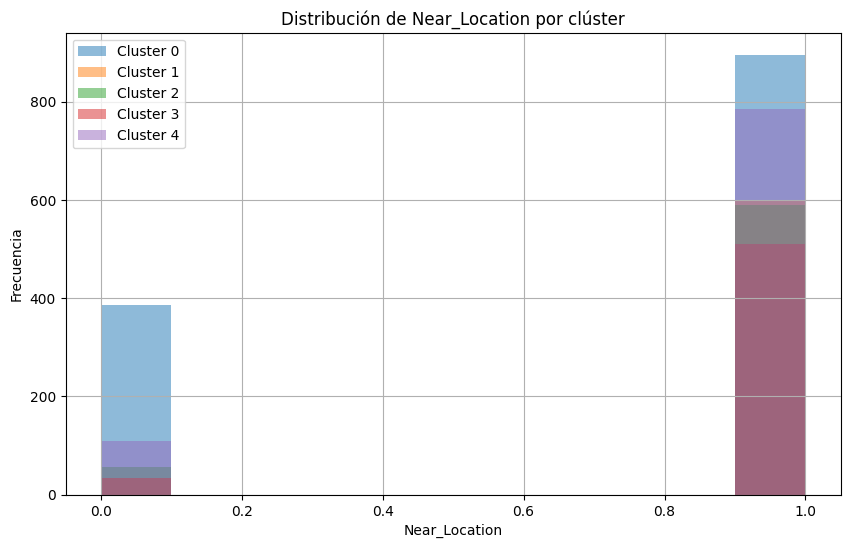

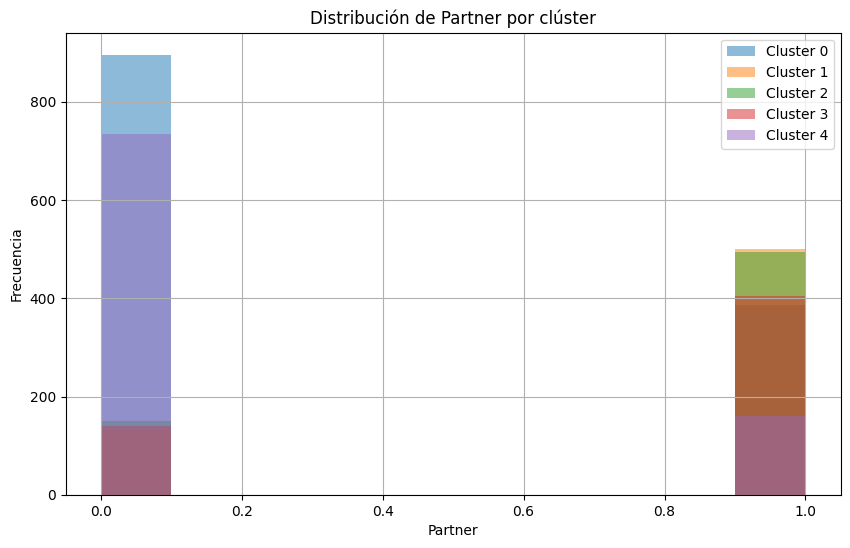

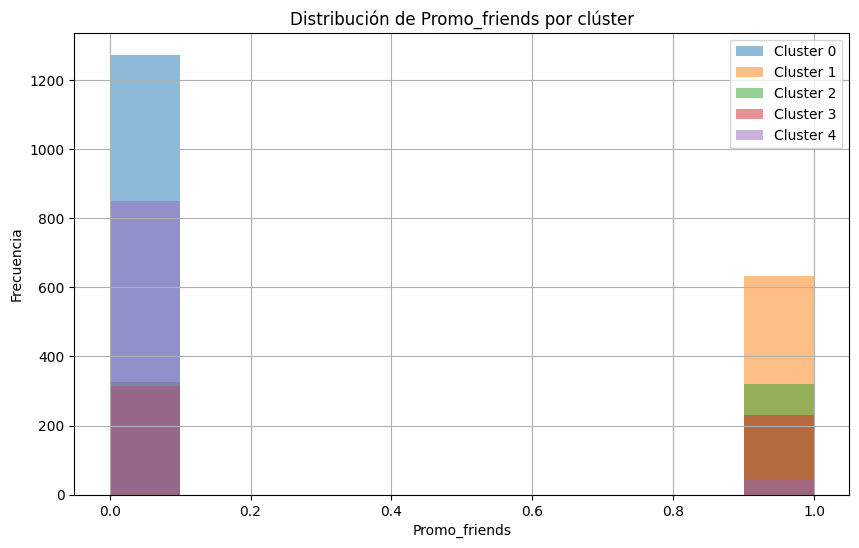

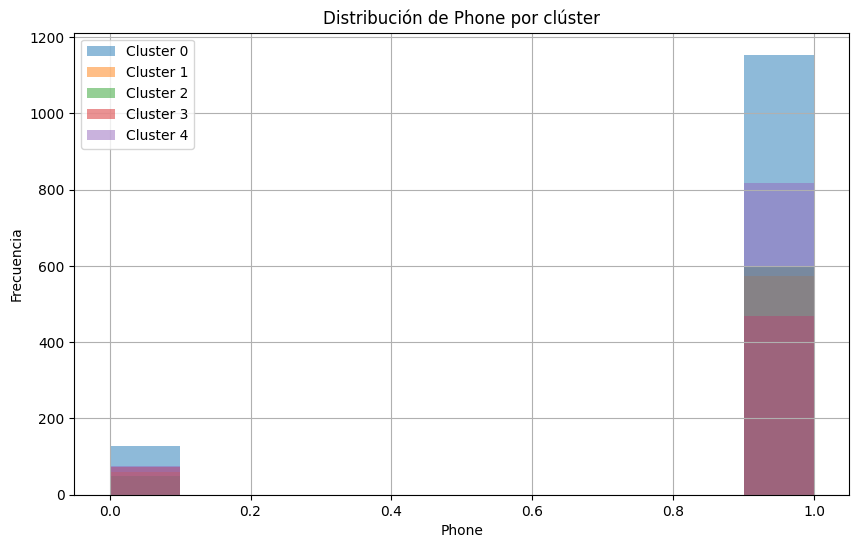

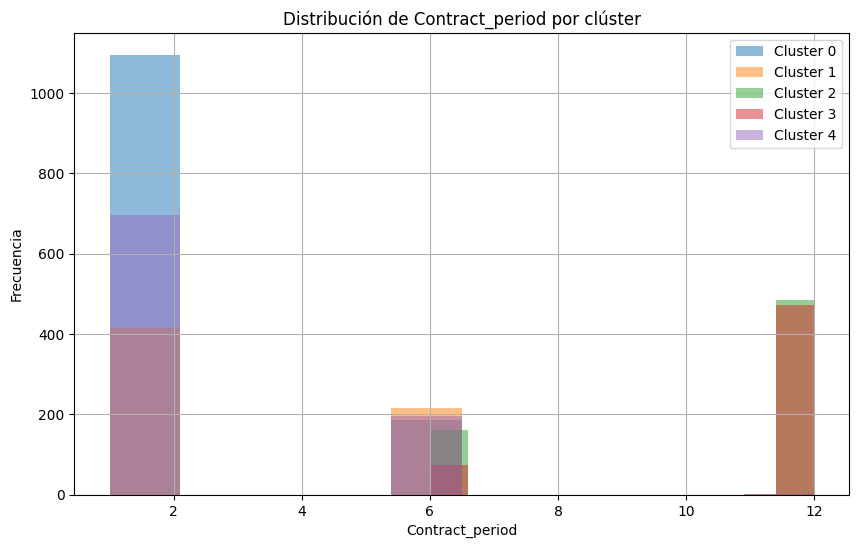

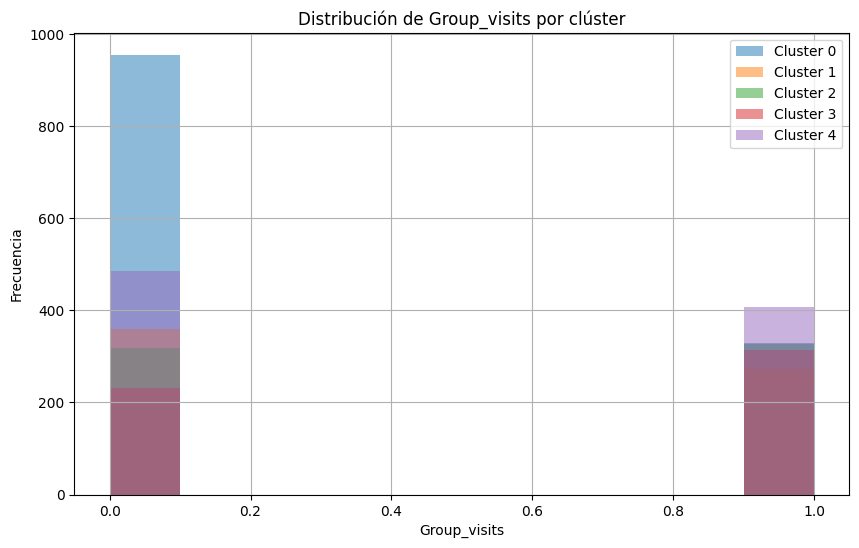

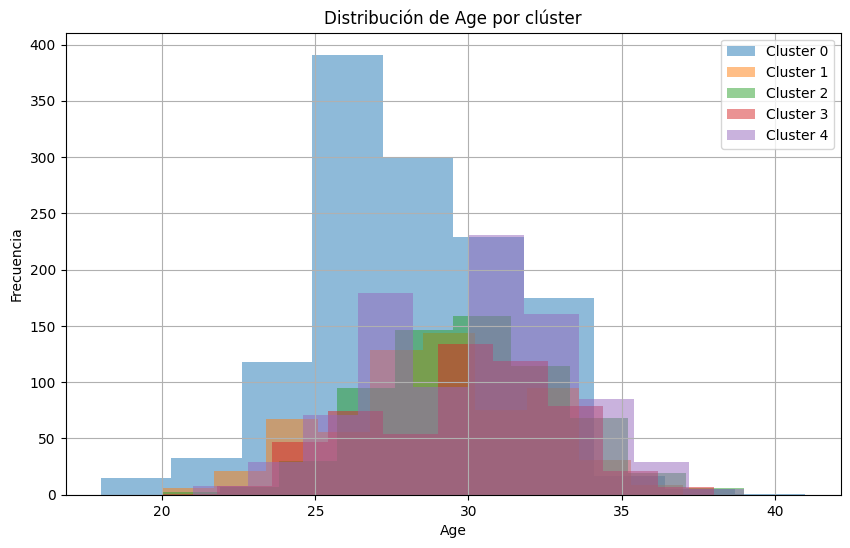

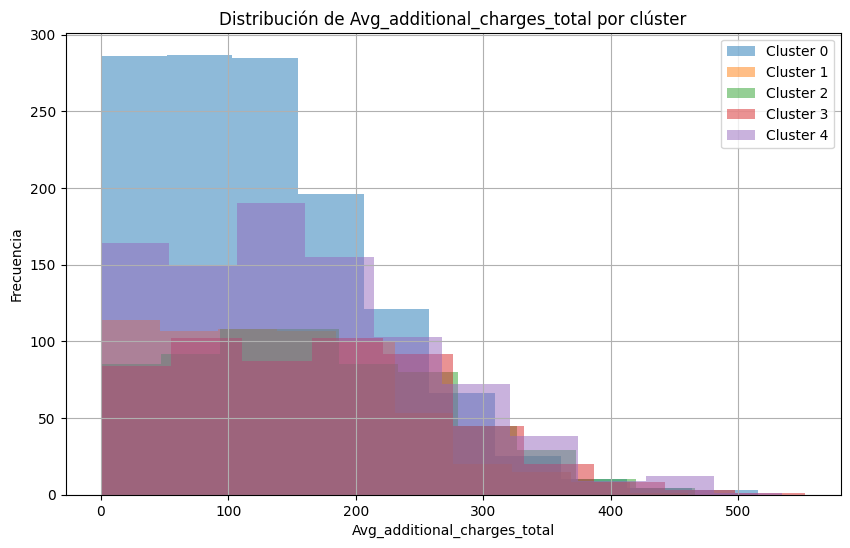

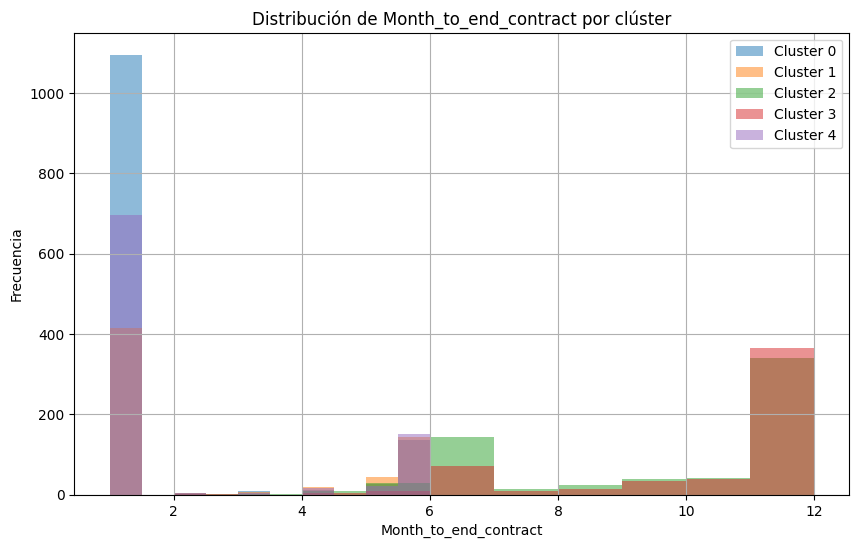

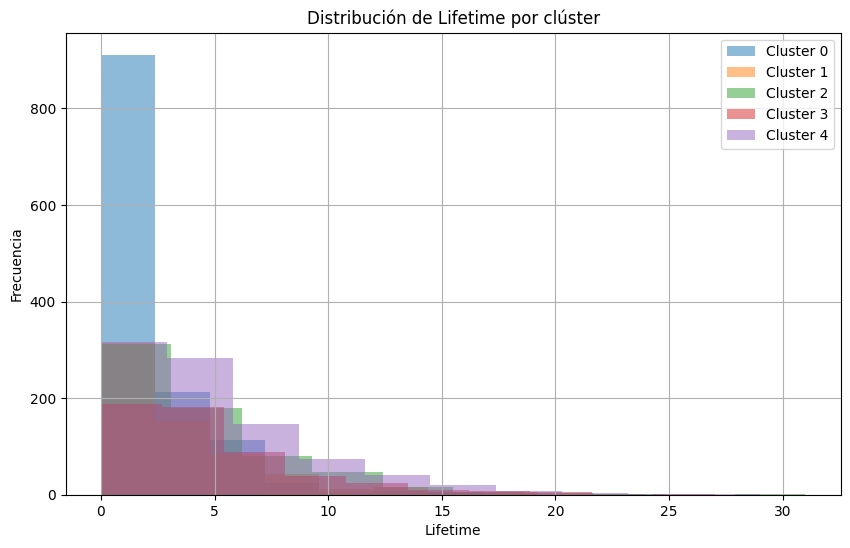

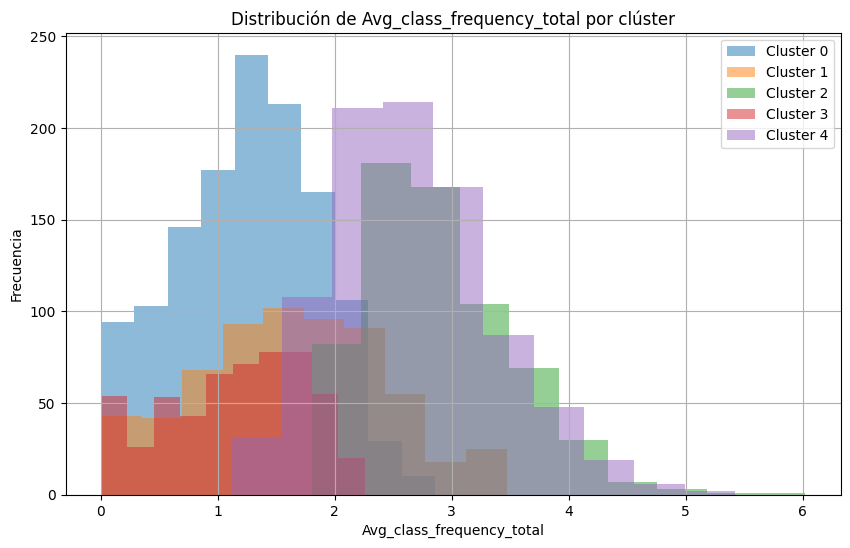

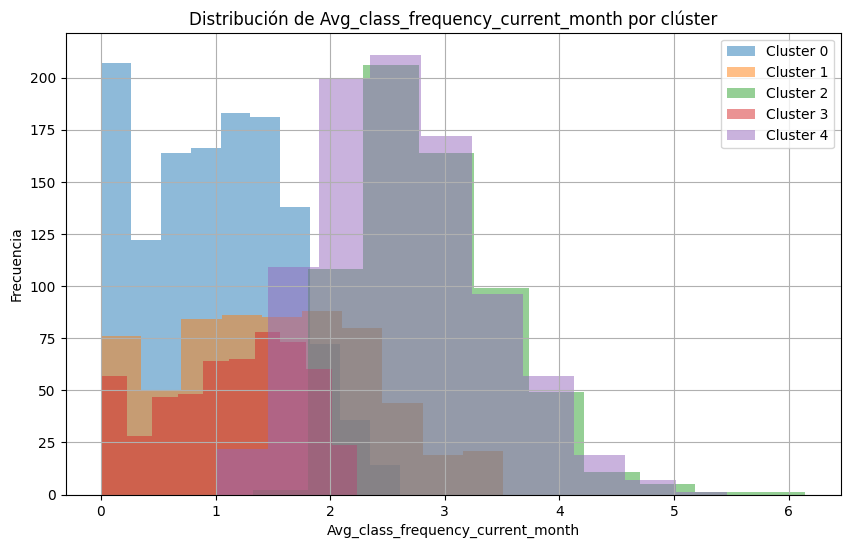


Tasa de cancelaci√≥n por cl√∫ster:
Cluster
0    0.587685
1    0.285940
2    0.013932
3    0.042279
4    0.105145
Name: Churn, dtype: float64

Patrones detectados:
El cl√∫ster 0 tiene una alta tasa de cancelaci√≥n (0.59).
El cl√∫ster 1 es m√°s leal (0.29).
El cl√∫ster 2 es m√°s leal (0.01).
El cl√∫ster 3 es m√°s leal (0.04).
El cl√∫ster 4 es m√°s leal (0.11).


In [5]:
# Paso 1: Eliminar la columna de cancelaci√≥n y estandarizar los datos
features = df.drop(columns=['Churn'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Paso 2: Crear una matriz de distancias y trazar el dendrograma
linked = linkage(features_scaled, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linked)
plt.title('Dendrograma')
plt.xlabel('√çndice de muestra')
plt.ylabel('Distancia')
plt.show()

# Paso 3: Entrenar el modelo de clustering con K-means
n_clusters = 5  # Usar n=5 como se indica en las instrucciones
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Agregar los cl√∫steres al dataframe original
df['Cluster'] = clusters

# Paso 4: Calcular valores medios de las caracter√≠sticas por cl√∫ster
cluster_means = df.groupby('Cluster').mean()

# Mostrar valores medios por cl√∫ster
print("Valores medios por cl√∫ster:")
print(cluster_means)

# Paso 5: Graficar distribuciones de caracter√≠sticas por cl√∫ster
for column in features.columns:
    plt.figure(figsize=(10, 6))
    for cluster in range(n_clusters):
        cluster_data = df[df['Cluster'] == cluster][column]
        cluster_data.hist(alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'Distribuci√≥n de {column} por cl√∫ster')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

# Paso 6: Calcular la tasa de cancelaci√≥n por cl√∫ster
churn_rate_by_cluster = df.groupby('Cluster')['Churn'].mean()
print("\nTasa de cancelaci√≥n por cl√∫ster:")
print(churn_rate_by_cluster)

# Identificar patrones
print("\nPatrones detectados:")
for cluster, churn_rate in churn_rate_by_cluster.items():
    if churn_rate > 0.5:
        print(f"El cl√∫ster {cluster} tiene una alta tasa de cancelaci√≥n ({churn_rate:.2f}).")
    else:
        print(f"El cl√∫ster {cluster} es m√°s leal ({churn_rate:.2f}).")

PATRONES
- Los cl√∫steres con contratos m√°s largos (Cl√∫ster 2 y Cl√∫ster 3) tienden a tener una mayor lealtad, mostrando tasas de cancelaci√≥n muy bajas. Esto sugiere que ofrecer incentivos para contratos m√°s prolongados puede ayudar a retener usuarios.
- La participaci√≥n en clases grupales y la frecuencia de uso del gimnasio est√°n fuertemente asociadas con la lealtad de los usuarios.
- Los usuarios referidos por promociones como "amigos" (Cl√∫ster 1) tienen una lealtad intermedia. Este grupo podr√≠a beneficiarse de estrategias que aumenten su participaci√≥n y frecuencia de uso.

RECOMENDACIONES
- Incentivar contratos a largo plazo: Ofrecer descuentos o beneficios adicionales a los usuarios que opten por contratos m√°s prolongados podr√≠a aumentar la lealtad.
- Fomentar la participaci√≥n en clases grupales: Dise√±ar programas personalizados o promociones para clases grupales podr√≠a motivar la participaci√≥n, especialmente en los cl√∫steres 0 y 1.
- Estrategias espec√≠ficas para el Cl√∫ster 0:
- Realizar encuestas para identificar razones de cancelaci√≥n (e.g., falta de tiempo, desinter√©s).
- Crear promociones atractivas para que los usuarios prueben m√°s servicios, como clases grupales o entrenamientos personalizados.
- Aprovechar el efecto de las recomendaciones: Los usuarios referidos (Cl√∫ster 1) tienen mayor potencial de lealtad si se les motiva con experiencias personalizadas y actividades que aumenten su conexi√≥n con el gimnasio.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>√âxito</b> - ¬°Excelente an√°lisis de cl√∫steres y patrones detectados! Tus observaciones sobre las tasas de cancelaci√≥n y las recomendaciones para estrategias espec√≠ficas son claras y accionables. Las visualizaciones tambi√©n ayudan a respaldar tus conclusiones. ¬°Muy bien hecho! </div>

## Saca conclusiones y haz recomendaciones b√°sicas sobre el trabajo con clientes

1. Enfocarse en los contratos a largo plazo
- Conclusi√≥n: Los usuarios con contratos m√°s largos (Cl√∫steres 2 y 3) tienen tasas de cancelaci√≥n significativamente m√°s bajas (1.4% y 4.2%). Esto indica que los contratos prolongados fomentan el compromiso.
- Recomendaci√≥n:Ofrecer descuentos o beneficios adicionales (p. ej., sesiones de entrenamiento personal gratuitas o acceso exclusivo a clases) para contratos de 6 meses o m√°s.
Crear campa√±as promocionales espec√≠ficas, como "Suscr√≠bete por un a√±o y ahorra un 20%".
2. Promover la participaci√≥n en actividades grupales
- Conclusi√≥n: La frecuencia de asistencia a clases grupales y la interacci√≥n social est√°n asociadas con una mayor retenci√≥n. Los cl√∫steres m√°s leales (Cl√∫steres 2 y 3) muestran alta participaci√≥n en estas actividades.
- Recomendaci√≥n: Organizar retos o eventos grupales mensuales, como "Semana de fitness en grupo" con premios para los participantes m√°s activos.
Ofrecer descuentos a los usuarios que se inscriban a m√∫ltiples clases grupales o que traigan amigos.
3. Recuperar clientes con alto riesgo de cancelaci√≥n
Conclusi√≥n: Los usuarios del Cl√∫ster 0 tienen la tasa de cancelaci√≥n m√°s alta (58.8%). Esto sugiere desinter√©s o desconexi√≥n con el servicio.
Recomendaci√≥n:
Implementar alertas de inactividad: si un usuario no asiste al gimnasio durante dos semanas, enviar correos electr√≥nicos personalizados con ofertas, como "Te extra√±amos, vuelve esta semana y obt√©n una clase gratis".
Realizar encuestas para entender las razones de su baja participaci√≥n y ajustar los servicios seg√∫n sus necesidades.
4. Aprovechar las recomendaciones de clientes existentes
Conclusi√≥n: El Cl√∫ster 1 muestra un buen potencial de retenci√≥n gracias a su alta participaci√≥n en promociones como "amigos referidos".
Recomendaci√≥n:
Crear un programa formal de referidos: por ejemplo, "Por cada amigo que invites, obt√©n un mes gratis".
Incentivar a los nuevos usuarios con descuentos exclusivos si se registran como parte de un referido.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>√âxito</b> - ¬°Gran trabajo sintetizando conclusiones y recomendaciones pr√°cticas! Las estrategias propuestas est√°n claramente alineadas con los patrones detectados en el an√°lisis y ofrecen acciones espec√≠ficas para mejorar la retenci√≥n de clientes. ¬°Excelente cierre! </div>

# Comentario general del revisor 


<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
¬°Felicidades Daniel! Tu proyecto est√° **aprobado**. Has demostrado un excelente manejo de los datos, an√°lisis detallado, y conclusiones bien fundamentadas. A continuaci√≥n, destaco los puntos positivos y algunas √°reas interesantes para seguir investigando:

Puntos Positivos:
- **An√°lisis exploratorio completo:** Identificaste patrones clave en el comportamiento de los clientes y exploraste correlaciones importantes.
- **Modelos predictivos bien ejecutados:** Comparaste y evaluaste modelos con m√©tricas relevantes, mostrando un enfoque anal√≠tico s√≥lido.
- **Clustering y segmentaci√≥n efectiva:** Creaste cl√∫steres interpretables y extra√≠ste conclusiones accionables para estrategias espec√≠ficas de retenci√≥n.
- **Recomendaciones claras:** Propuestas estrat√©gicas basadas en datos, con acciones espec√≠ficas para cada segmento identificado.

√Åreas para Seguir Investigando:
- **Optimizaci√≥n de modelos:** Experimentar con t√©cnicas avanzadas de modelado o hiperparametrizaci√≥n para mejorar a√∫n m√°s las m√©tricas predictivas.
- **An√°lisis temporal:** Explorar tendencias a lo largo del tiempo para identificar posibles estacionalidades en el comportamiento de los clientes.
- **Evaluaci√≥n post-implementaci√≥n:** Medir el impacto de las estrategias sugeridas, como campa√±as de referidos o incentivos de contratos, en la retenci√≥n real de clientes.

¬°Sigue as√≠! Tus habilidades anal√≠ticas y capacidad para generar recomendaciones accionables son destacables. üöÄüí™üòä
</div>
